In [0]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import SGD,Adam,RMSprop

import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
IMG_CHANNELS=3
IMG_ROWS=32
IMG_COLS=32


In [0]:
BATCH_SIZE=128
NB_EPOCH=20
NB_CLASSES=10
VERBOSE=1
VALIDATION_SPLIT=0.2
OPTIM=RMSprop()

In [8]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print('X_train shape:',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

170508288/170498071 [==============================] - 21s 0us/step
('X_train shape:', (50000, 32, 32, 3))
(50000, 'train samples')
(10000, 'test samples')


In [0]:
Y_train=np_utils.to_categorical(y_train,NB_CLASSES)
Y_test=np_utils.to_categorical(y_test,NB_CLASSES)

In [0]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train /=255
X_test  /=255

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(IMG_ROWS,IMG_COLS,IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])

In [13]:
history=model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,validation_split=VALIDATION_SPLIT,verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 8s 192us/step - loss: 1.7716 - acc: 0.3785 - val_loss: 1.5739 - val_acc: 0.4373
Epoch 2/20
40000/40000 [==============================] - 6s 146us/step - loss: 1.3875 - acc: 0.5090 - val_loss: 1.2624 - val_acc: 0.5588
Epoch 3/20
40000/40000 [==============================] - 6s 149us/step - loss: 1.2496 - acc: 0.5592 - val_loss: 1.1417 - val_acc: 0.6114
Epoch 4/20
 8192/40000 [=====>........................] - ETA: 4s - loss: 1.1741 - acc: 0.5964

40000/40000 [==============================] - 6s 149us/step - loss: 1.1540 - acc: 0.5999 - val_loss: 1.1249 - val_acc: 0.6097
Epoch 5/20
40000/40000 [==============================] - 6s 148us/step - loss: 1.0809 - acc: 0.6220 - val_loss: 1.1519 - val_acc: 0.6037
Epoch 6/20
40000/40000 [==============================] - 6s 150us/step - loss: 1.0213 - acc: 0.6421 - val_loss: 1.1020 - val_acc: 0.6163
Epoch 7/20
24576/40000 [=================>............] - ETA: 2s - loss: 0.9646 - acc: 0.6641

40000/40000 [==============================] - 6s 148us/step - loss: 0.9657 - acc: 0.6631 - val_loss: 1.0420 - val_acc: 0.6397
Epoch 8/20
40000/40000 [==============================] - 6s 146us/step - loss: 0.9294 - acc: 0.6775 - val_loss: 1.0711 - val_acc: 0.6401
Epoch 9/20
40000/40000 [==============================] - 6s 147us/step - loss: 0.8857 - acc: 0.6921 - val_loss: 1.1776 - val_acc: 0.6209
Epoch 10/20
27648/40000 [===================>..........] - ETA: 1s - loss: 0.8510 - acc: 0.7046

40000/40000 [==============================] - 6s 147us/step - loss: 0.8504 - acc: 0.7040 - val_loss: 0.9855 - val_acc: 0.6698
Epoch 11/20
40000/40000 [==============================] - 6s 146us/step - loss: 0.8162 - acc: 0.7169 - val_loss: 1.0604 - val_acc: 0.6476
Epoch 12/20
40000/40000 [==============================] - 6s 147us/step - loss: 0.7841 - acc: 0.7275 - val_loss: 0.9676 - val_acc: 0.6773
Epoch 13/20
27904/40000 [===================>..........] - ETA: 1s - loss: 0.7504 - acc: 0.7375

40000/40000 [==============================] - 6s 146us/step - loss: 0.7554 - acc: 0.7360 - val_loss: 1.0150 - val_acc: 0.6659
Epoch 14/20
40000/40000 [==============================] - 6s 148us/step - loss: 0.7292 - acc: 0.7509 - val_loss: 1.0446 - val_acc: 0.6515
Epoch 15/20
40000/40000 [==============================] - 6s 147us/step - loss: 0.7086 - acc: 0.7532 - val_loss: 1.0134 - val_acc: 0.6702
Epoch 16/20
27520/40000 [===================>..........] - ETA: 1s - loss: 0.6797 - acc: 0.7672

40000/40000 [==============================] - 6s 148us/step - loss: 0.6847 - acc: 0.7650 - val_loss: 0.9838 - val_acc: 0.6795
Epoch 17/20
40000/40000 [==============================] - 6s 145us/step - loss: 0.6575 - acc: 0.7727 - val_loss: 1.1722 - val_acc: 0.6486
Epoch 18/20
40000/40000 [==============================] - 6s 147us/step - loss: 0.6418 - acc: 0.7797 - val_loss: 0.9870 - val_acc: 0.6783
Epoch 19/20
27904/40000 [===================>..........] - ETA: 1s - loss: 0.6210 - acc: 0.7868

40000/40000 [==============================] - 6s 148us/step - loss: 0.6222 - acc: 0.7852 - val_loss: 1.1353 - val_acc: 0.6460
Epoch 20/20
40000/40000 [==============================] - 6s 148us/step - loss: 0.5957 - acc: 0.7952 - val_loss: 0.9997 - val_acc: 0.6892


In [14]:
print('Testing....')
score=model.evaluate(X_test,Y_test,batch_size=BATCH_SIZE,verbose=VERBOSE)
print("\n Test Score:",score[0])
print("\n Test Score:",score[1])



Testing....
10000/10000 [==============================] - 1s 58us/step
('\n Test Score:', 1.0122417866706848)
('\n Test Score:', 0.6756)


In [0]:
model_json=model.to_json()
open('cifar10_architecture.json','w').write(model_json)
model.save_weights('cifar10_weights.h5',overwrite=True)

['acc', 'loss', 'val_acc', 'val_loss']


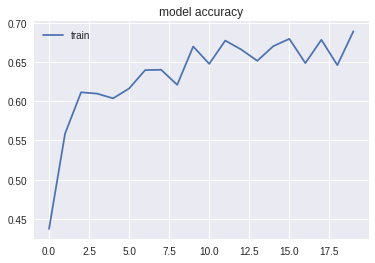

In [16]:
print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel=('accuracy')
plt.xlabel=('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

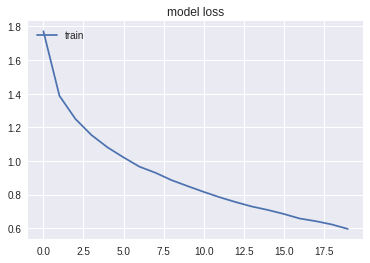

In [17]:

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel=('loss')
plt.xlabel=('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()